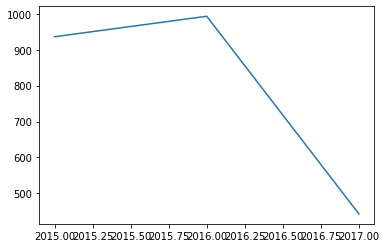

2015 936
2016 993
2017 443


In [10]:
#Number of Fundings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("startup_funding.csv")

a=df.Date
dates=a.values
d={}
for i in range(len(dates)):
    year=((dates[i])[-1:-5:-1])[::-1]
    d[year]=d.get(year,0)+1
x=[]
y=[]
for i in d:
    x.append(int(i))
    y.append(d[i])

plt.plot(x,y)
plt.show()

for i in range(len(x)-1,-1,-1):
    print(x[i],y[i])
    


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')

def convertDate(date):
    return date.split("/")[-1]

data["Year"]=df_start["Date"].apply(convertDate)
data["Year"].value_counts()

2016       993
2015       932
2017       443
05.2015      2
04.2015      1
01.2015      1
Name: Year, dtype: int64

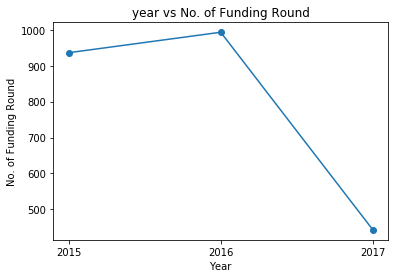

2015 936
2016 993
2017 443


In [4]:

#Number of Fundings
df_start=pd.read_csv("startup_funding.csv",encoding="utf-8")

df_start["Date"].replace("12/05.2015","12/05/2015",inplace=True)
df_start["Date"].replace("13/04.2015","13/04/2015",inplace=True)
df_start["Date"].replace("15/01.2015","15/01/2015",inplace=True)
df_start["Date"].replace("22/01//2015","22/01/2015",inplace=True)

def convertDate(date):
    return date.split("/")[-1]

df_start["Year"]=df_start["Date"].apply(convertDate)
year_count=df_start["Year"].value_counts()

year_fund=list(zip(year_count.index,year_count.values))

year_fund=np.array(year_fund,dtype=int)

year_fund=year_fund[year_fund[:,0].argsort()]

year=year_fund[:,0]
funding_round=year_fund[:,1]


plt.plot(year,funding_round,marker="o")
plt.xticks(year)
plt.title("year vs No. of Funding Round")
plt.xlabel("Year")
plt.ylabel("No. of Funding Round")
plt.show()
for i in range(len(year)):
    print(year[i],funding_round[i])

In [15]:
df_start["Date"].describe()

count           2372
unique           701
top       02/02/2015
freq              11
Name: Date, dtype: object

In [120]:
a=[1,2,3,4,5]
b=["a","s","f","g","h"]
c=list(zip(a,b))
c

[(1, 'a'), (2, 's'), (3, 'f'), (4, 'g'), (5, 'h')]

In [160]:
a=np.array([['Bangalore', '630'],
       ['Mumbai', '446'],
       ['New Delhi', '386'],
       ['Gurgaon', '240'],
       ['asdfg', '179'],
       ['Pune', '85'],
       ['Noida', '78'],
       ['Hyderabad', '77'],
       ['Chennai', '67'],
       ['Ahmedabad', '35']])


TypeError: only size-1 arrays can be converted to Python scalars

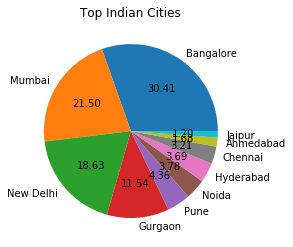

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [237]:
#Top Indian Cities
df_start=pd.read_csv("startup_funding.csv",encoding="utf-8")

df_start["CityLocation"].replace("Delhi" , "New Delhi",inplace=True)
df_start["CityLocation"].replace("bangalore" , "Bangalore",inplace=True)

df_start.fillna("NULL",inplace=True)

index = df_start[df_start["CityLocation"]=='NULL'].index
df_start.drop(index,inplace=True)

index = df_start[df_start["CityLocation"]==None].index
df_start.drop(index,inplace=True)
def convertCity(c):
    return c.split("/")[0].strip()

df_start["new_city"]=df_start["CityLocation"].apply(convertCity)

city=df_start["new_city"].value_counts()

top_ten=city[0:10]

tc=top_ten.index
tc=np.array(tc)

tn=top_ten.values
tn=np.array(tn,dtype=int)

plt.pie(tn,labels=tc,autopct="%.2f")
plt.title("Top Indian Cities")
plt.show()

for i in range(len(tc)):
    print(tc[i],tn[i])

In [254]:
#Top Investor


df=pd.read_csv("startup_funding.csv",encoding="utf-8")

a=df["InvestorsName"].str.split(',')

a.dropna(inplace=True)

d={}

for i in a:
    for j in i:   
        d[j.strip()]=d.get(j.strip(),0)+1
m=max(d.values())
for i in d:
    if d[i]==m:
        print(i,d[i])
    



Sequoia Capital 64


In [ ]:
d[a[i].split(",")]=d.get(a[i].split(","),0)+1

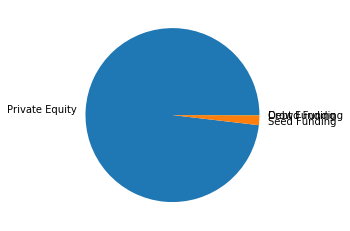

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')

df_start["AmountInUSD"].dropna(inplace=True)


df_start['InvestmentType'].replace("PrivateEquity","Private Equity",inplace=True)
df_start['InvestmentType'].replace("SeedFunding","Seed Funding",inplace=True)
df_start['InvestmentType'].replace("Crowd funding","Crowd Funding",inplace=True)

df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])

inv_amount=df_start.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending=False)


inv=inv_amount.index
amount=inv_amount.values
total=amount.sum()
per_amount=[(ele/total)*100 for ele in amount]

plt.pie(per_amount,labels=inv)
plt.show()
for i in range(len(inv)):
    print(inv[i],format(per_amount[i],".2f"))

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('startup_funding.csv')
df['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df['CityLocation'].replace("bangalore","Bangalore",inplace=True)
city = df.CityLocation.str.split(expand = True, pat = '/')[0].str.title().value_counts()
city_data = df['CityLocation'] 
unique = pd.unique(city.index)
fund = {}
for i in unique:
    city_name = i
    city_fund = df[df['CityLocation'] == i]
    sum_fund = city_fund['AmountInUSD']
    sum_fund.fillna(0, inplace = True)
    abc = sum_fund.apply(lambda x: float(str(x).replace(",", "")))
    final_sum = abc.sum()
    fund[i] = final_sum

sort_orders = sorted(fund.items(), key=lambda x: x[1], reverse=True)
values = []
arr = []
for i in range(10):
    values.append(sort_orders[i][1])
    arr.append(sort_orders[i])

C:\Users\Piyush Pravin\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('startup_funding.csv')
df['CityLocation'].dropna(inplace=True)
df['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df['CityLocation'].replace("bangalore","Bangalore",inplace=True)
df.CityLocation.replace(' /','/')

city = df.CityLocation.str.split(expand = True, pat = '/')[0].str.title().value_counts()
city_data = df['CityLocation'] 
unique = pd.unique(city.index)
fund = {}

for i in unique:
    city_name = i
    
    city_fund = df[df['CityLocation'] == i]
    sum_fund = city_fund['AmountInUSD']
    #sum_fund.dropna(inplace = True)
    abc = sum_fund.apply(lambda x: float(str(x).replace(",", "")))
    final_sum = abc.sum()
    fund[i] = final_sum

sort_orders = sorted(fund.items(), key=lambda x: x[1], reverse=True)
values = []
arr = []
for i in range(10):
    values.append(sort_orders[i][1])
    arr.append(sort_orders[i])

explode = [0.1,0.2,0.3,0.4,0,0.2,0.3,1.2,0.1,0.9]
plt.pie(values,  explode = explode, pctdistance=0.85, wedgeprops={'edgecolor' :'black'}, autopct = '%.2f', shadow = True,)
plt.axis('equal')
plt.tight_layout()

plt.show()
    
print('Bangalore', 49.71)
print('New Delhi', 16.63)
print('Mumbai', '13.90')
print('Gurgaon', 12.21)
print('Chennai', 2.43)
print('Pune', 2.16)
print('Hyderabad', 1.15)
print('Noida', 1.01)
print('Ahmedabad', 0.58)
print('Jaipur', 0.21)


C:\Users\Piyush Pravin\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [16]:
# Print the required output in given format
import pandas as pd
import numpy as np
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start['CityLocation'].dropna(inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()
df_start['CityLocation']=df_start['CityLocation'].apply(separateCity)
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True)

## Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])

city_amount=df_start.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]
city=city_amount.index
amountCity=city_amount.values
perAmount=np.true_divide(amountCity, amountCity.sum())*100
for i in range(len(city)):
    print(city[i],format(perAmount[i],'.2f'))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [12]:
sort_orders

[('Bangalore', 8383774108.0),
 ('New Delhi', 2751247500.0),
 ('Mumbai', 2343694500.0),
 ('Gurgaon', 2067821500.0),
 ('Chennai', 411105000.0),
 ('Pune', 282153000.0),
 ('Hyderabad', 194762000.0),
 ('Noida', 170338000.0),
 ('Ahmedabad', 98186000.0),
 ('Jaipur', 35560000.0),
 ('Chandigarh', 26100000.0),
 ('Kolkata', 13865000.0),
 ('Udupi', 12000000.0),
 ('Vadodara', 6040000.0),
 ('Singapore', 3850000.0),
 ('Boston', 3000000.0),
 ('Goa', 2380000.0),
 ('Bhopal', 1900000.0),
 ('Indore', 1672000.0),
 ('Coimbatore', 1650000.0),
 ('Lucknow', 1000000.0),
 ('Gwalior', 900000.0),
 ('Panaji', 825000.0),
 ('Belgaum', 500000.0),
 ('Missourie', 350000.0),
 ('Kanpur', 220000.0),
 ('Jodhpur', 160000.0),
 ('Trivandrum', 100000.0),
 ('Varanasi', 52000.0),
 ('Kerala', 27000.0),
 ('Agra', 0.0),
 ('Siliguri', 0.0),
 ('Kochi', 0.0),
 ('Usa', 0),
 ('Us', 0),
 ('Hubli', 0.0),
 ('New York', 0),
 ('Seattle', 0),
 ('Karur', 0.0),
 ('Nagpur', 0.0),
 ('London', 0.0),
 ('Surat', 0.0),
 ('Udaipur', 0.0),
 ('Kozhikode'

Bangalore 45.91
New Delhi 15.36
Mumbai 12.84
Gurgaon 11.28
Chennai 2.24
Pune 2.00
Hyderabad 1.06
Noida 0.93
Ahmedabad 0.54
Jaipur 0.19
{'Bangalore': 8422974108, 'Mumbai': 2354934500, 'New Delhi': 2818247500, 'Hyderabad': 195362000, 'Ahmedabad': 98186000, 'Gurgaon': 2069021500, 'Noida': 170638000, 'Pune': 366653000, 'Kolkata': 13865000, 'Trivandrum': 100000, 'Chennai': 411105000, 'Chandigarh': 26100000, 'Jaipur': 35560000, 'Vadodara': 6040000, 'Surat': 0, 'Missourie': 350000, 'Panaji': 825000, 'Gwalior': 900000, 'Karur': 0, 'Udupi': 12000000, 'Kochi': 0, 'Indore': 1672000, 'Singapore': 3850000, 'Goa': 2380000, 'Agra': 0, 'Hubli': 0, 'Kerala': 27000, 'Kozhikode': 0, 'US': 3000000, 'Coimbatore': 1650000, 'Siliguri': 0, '': 1271863868, 'USA': 16600000, 'Lucknow': 1000000, 'Kanpur': 220000, 'SFO': 2700000, 'London': 0, 'Seattle': 0, 'Varanasi': 52000, 'Bhopal': 1900000, 'Jodhpur': 160000, 'Boston': 3000000, 'Belgaum': 500000, 'New York': 2950000, 'Nagpur': 0, 'India': 30000000, 'Udaipur': 0

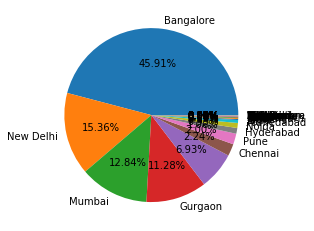

In [44]:
# Open and read data file as specified in the question
# Print the required output in given format
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
start=pd.read_csv("startup_funding.csv")

start['CityLocation'].fillna("",inplace=True)
start['AmountInUSD'].fillna("0,0",inplace=True)
#print(start['AmountInUSD'])
def amount(amt):
    amt=str(amt)
    s=""
    l=[]
    x=amt.split(',')
    for i in x:
        s=s+i
    return int(s)
start['AmountInUSD']=start['AmountInUSD'].apply(amount)
#print(start['AmountInUSD'])
x=start['AmountInUSD']

def sep(city):
    return city.split('/')[0].strip()
start['CityLocation']=start['CityLocation'].apply(sep)
start['CityLocation'].replace("Delhi","New Delhi",inplace=True)
start['CityLocation'].replace("bangalore","Bangalore",inplace=True)

y=start['CityLocation']
#num=start['CityLocation'].value_counts()
#print(len(start['CityLocation']),len(start['AmountInUSD']))
#print(x)
#print(y)
a={}
for i in range(len(start['CityLocation'])):
    if(y[i] in a):
        a[y[i]]=a[y[i]]+x[i]
    else:
        a[y[i]]=x[i]
bb=sorted(a.items(),key=lambda x:x[1])
l1=list(bb)
aaa=l1[-1::-1]
xx=[]
yy=[]
for i in aaa:
    xx.append(i[0])
    yy.append(i[1])
xx=np.array(xx)
yy=np.array(yy)
plt.pie(yy,labels=xx,autopct="%.2f%%")
#plt.show()
hell=np.true_divide(yy,yy.sum(axis=0,keepdims=True))*100
for i in range(0,4):
    print(xx[i],format(hell[i],'.2f'))
for i in range(5,11):
    print(xx[i],format(hell[i],'.2f'))
print(a)

In [24]:
import pandas as pd
import numpy as np
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start['CityLocation'].dropna(inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()
df_start['CityLocation']=df_start['CityLocation'].apply(separateCity)
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True)
## Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
city_amount=df_start.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]
city=city_amount.index
amountCity=city_amount.values
perAmount=np.true_divide(amountCity, amountCity.sum())*100
for i in range(len(city)):
    print(city[i],format(perAmount[i],'.2f'))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21
